In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('all_the_data_rmOutliers.csv')

In [3]:
df.mouse_details_strain.unique()

array(['BW', 'BWPOF2', 'PO', 'BWPOF1'], dtype=object)

In [4]:
df = df[df.mouse_details_sex.isin(['M', 'F'])]
df = df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1', 'BWPOF2'])]
df['Sex'] = df['mouse_details_sex'].apply(lambda x: 'Male' if x == 'M' else 'Female')

In [5]:
var = 'mouse_dimensions_mouseLength'
df_2 = df[['mouse_details_strain', 'mouse_details_sex', 'Sex', var]]
df_2.head(10)

,mouse_details_strain,mouse_details_sex,Sex,mouse_dimensions_mouseLength
0,BW,M,Male,7.260598
1,BW,M,Male,7.118170
2,BWPOF2,F,Female,7.168398
3,BWPOF2,F,Female,7.118569
4,PO,F,Female,6.785503
5,PO,F,Female,6.252075
6,PO,F,Female,6.363449
7,BWPOF2,M,Male,6.713208
8,BWPOF2,M,Male,6.911091
9,BWPOF2,M,Male,6.294963


In [16]:
def detect_outlier(data_1):
    outliers = []
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [17]:
detect_outlier(df[var])

[4.253887706079994,
 1.7164851169065538,
 0.7419513411985678,
 4.248009343377934,
 2.9180466852291254,
 3.0534834512102234,
 1.3213879278350698,
 3.791349987951405,
 3.466719492868463,
 2.2610960259218507,
 2.807894380429563,
 9.1650675161073,
 3.5391649707755604,
 3.9032612117896814,
 4.210412448925388,
 3.073711020155453,
 3.684935386109113,
 3.8922679677977103,
 2.779311946050435,
 4.421922463330935,
 1.7828843106180663,
 3.0427100720980915,
 4.450944627469743,
 1.9785640536751736,
 4.246250424339219]

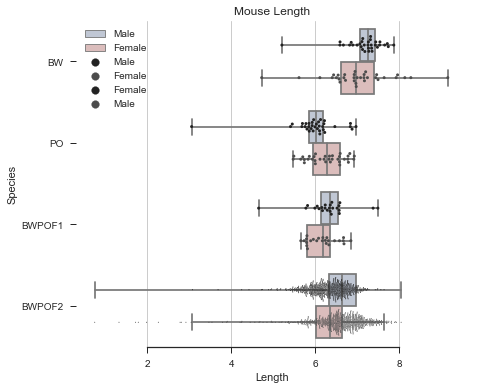

In [11]:
var = 'mouse_dimensions_mouseLength'
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
            whis="range", palette="vlag", order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'] )

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Tweak the visual presentation
ax.set_title("Mouse Length")
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Length")
sns.despine(trim=True, left=True)

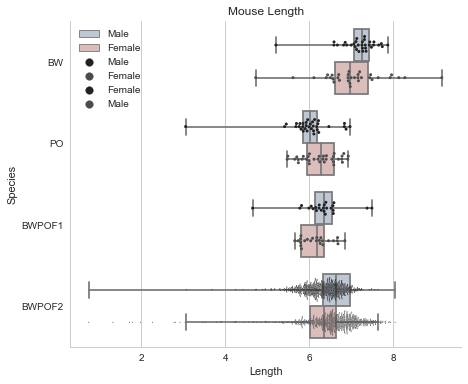

In [7]:
var = 'mouse_dimensions_mouseLength'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
            whis="range", palette="vlag", order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'] )

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Tweak the visual presentation
ax.set_title("Mouse Length")
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Length")
#ax.ylim(min(df[var], max(df[var])))
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

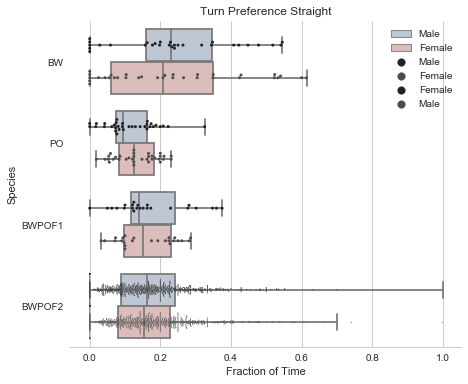

In [8]:
var = "turning_preferences_fraction_straight"
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")#, inner = None)

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Turn Preference Straight")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

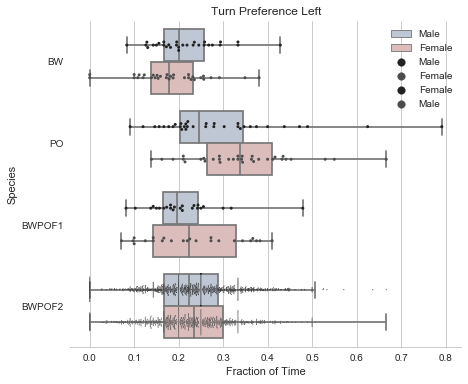

In [9]:
var = "turning_preferences_fraction_left"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Turn Preference Left")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

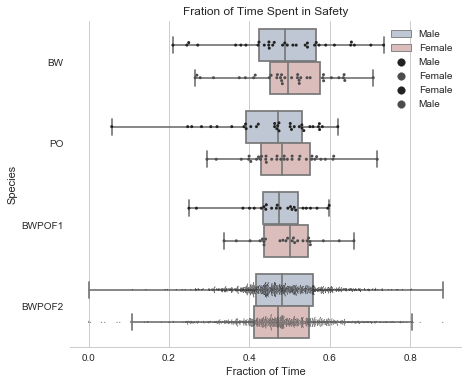

In [10]:
var = "safety_fraction_closed_arms"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fration of Time Spent in Safety")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

df[df.mouse_dimensions_mouseLength == min(df.mouse_dimensions_mouseLength)] df = df.drop([402])

df[df.backtrack_counts_CL == max(df.backtrack_counts_CL)]
df = df.drop([725])

df[df.velocity_OB_total_average_speed == max(df.velocity_OB_total_average_speed)]
df = df.drop([27])

df[df.peeking_average_length_CL == max(df.peeking_average_length_CL)]
df = df.drop([857])

df[df.velocity_OB_total_median_speed_active == max(df.velocity_OB_total_median_speed_active)]
df = df.drop([1617])

df[df.velocity_OT_down_median_speed_active > max(df.velocity_OT_total_median_speed_active-4)]
df = df.drop([7])

df.to_csv('all_the_data_rmOutliers.csv', index = False)

max(df.velocity_OT_total_median_speed_active)